# Proyecto 1
Laura Alejandra Palomino Camacho y Lady Tatiana Aguillón Suárez

## Introducción
En el proyecto desarrollado a continuación se busca realizar un análisis de las tendencias de compra de las personas, con relación a su salario. Teniendo en cuenta una base de datos determinada. Con lo anterior, se realizó una exploración de los datos, un tratamiento y transformación de estos. Buscando enriquecer la base de datos en pro de la clasificación y categorización de estos.

## Importación de librerias

In [2]:
!pip install wooldridge pingouin missingno

import wooldridge as wd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as st
import pingouin as pg

import missingno as ms

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer, MissingIndicator
from scipy.spatial.distance import mahalanobis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=2d3ff8b063531f16db6993b775e7b4d73d9f4b893e8f6b4c21d802c778fb82bc
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


## Carga de datos

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/labeconometria/MLxE/main/proyectos1er/dataset_1.csv')
dataset

,user_id,gender,wage,purchased,birth_day
0,217,Female,NaN,0,1983-08-06
1,226,Female,146500.0,1,1972-01-28
2,697,Male,NaN,1,1981-12-12
3,743,Female,NaN,0,1983-05-26
4,63,Female,140500.0,1,1967-11-02
...,...,...,...,...,...
1169,636,Male,76500.0,0,1970-08-26
1170,320,Female,143500.0,1,1970-04-07
1171,136,Female,NaN,1,1968-12-28
1172,721,Male,148000.0,1,1993-11-23


## Exploración inicial

In [4]:
dataset.head()

,user_id,gender,wage,purchased,birth_day
0,217,Female,NaN,0,1983-08-06
1,226,Female,146500.0,1,1972-01-28
2,697,Male,NaN,1,1981-12-12
3,743,Female,NaN,0,1983-05-26
4,63,Female,140500.0,1,1967-11-02


In [5]:
dataset.tail()

,user_id,gender,wage,purchased,birth_day
1169,636,Male,76500.0,0,1970-08-26
1170,320,Female,143500.0,1,1970-04-07
1171,136,Female,NaN,1,1968-12-28
1172,721,Male,148000.0,1,1993-11-23
1173,471,man,60500.0,0,1984-06-02


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    1174 non-null   int64  
 1   gender     1174 non-null   object 
 2   wage       930 non-null    float64
 3   purchased  1174 non-null   int64  
 4   birth_day  1174 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.0+ KB


###Conclusión
Dada la exploración realizada se pudo encontrar la presencia de 5 variables. De las cuales dos variables son Int, correspondientes a Purchased y User ID. Tambien, se encuentran dos de tipo Object, correspondientes a Gender Y Birth day. Por último, se encuentra una variable de tipo Float correspondiente a Wage. Para esta ultima variable se pueden observar datos NaN.

## Transformación de tipos de datos y manejo de memoria

In [7]:
dataset.columns

Index(['user_id', 'gender', 'wage', 'purchased', 'birth_day'], dtype='object')

In [8]:
dataset = dataset.astype({'user_id':'int16',
                    'purchased':'int16',
                    'birth_day':'datetime64'})

In [9]:
dataset["gender"] = dataset["gender"].str.lower()

###Conclusión
Para una transformación óptima se realizó el cambio con el comando as.type de la variable birth_day para que fuese de tipo datetime y por otro lado, los datos de la variable gender se pusieron en minúscula para no afectar procesos posteriores.


## Revisión de duplicados explícitos e implícitos

In [10]:
for col in dataset.columns:
  print(col)
  print(dataset[col].unique())

user_id
[ 217  226  697  743   63   92  971  777  753  211  891  817  587  889
  126  238  733  483  463  139  994  473  316  662  578  180  631  129
  688  341  382   54  998  961  583  128  542  654  950  367  243  488
   80  307  793  269  607  319  702  903  745    1  679  757  689  440
  568  922  701   64  346  775  432  551  107  674  283  321  653  393
  962  357   73  771  304  429  703   69  363  308  544  419  599  917
  744  555  867   82  120  175  279  329  567  188  833  579  859  142
  791  589  276  704   19  729  815  651  850  335  200  944  947  621
  204  780  902  417  420  462  750  273  522  907  360  968  672  262
  324  881  285  371  554  720  250  151  914  625  862  106  582  192
  766  687  983  841  242  479  228  478  178  206  616  931  286  788
  378   23  369  428  513  541  433  476   90  127  834  553  386  915
  822   25  540  957  987  213  591   55  742  698  425  576  893  796
  974  160  100  581  716  300  695   27  911  942  933  533  690  92

In [11]:
dataset['gender'].value_counts(normalize=True)

female    0.440375
male      0.429302
woman     0.074106
man       0.056218
Name: gender, dtype: float64

In [12]:
dataset = (dataset
        .replace({'man':'male',
                  'woman':'female'}))
dataset['gender'].value_counts()

female    604
male      570
Name: gender, dtype: int64

In [13]:
dataset ['gender'].value_counts(normalize=True)

female    0.51448
male      0.48552
Name: gender, dtype: float64

In [14]:
dataset.duplicated().sum()

174

In [15]:
dataset = dataset.drop_duplicates().reset_index(drop=True)

In [16]:
dataset.duplicated().sum()

0

### Conclusión 
Para la revisión de duplicados implícitos y explícitos, se hizo uso del comando value_counts que nos permite conocer la frecuencia de los datos y se pudo encontrar que la variable Gender se repitan Female- Woman y Man- Male. Para esto se unificaron los datos y por otro lado con el comando dataset.duplicated se encontraron 174 duplicados que posteriormente fueron eliminados.


## Verificación de missing values y tratamiento

In [17]:
dataset.isna().sum()

user_id        0
gender         0
wage         214
purchased      0
birth_day      0
dtype: int64

In [18]:
datasetna = dataset.dropna()

In [19]:
datasetna['gender'].value_counts(normalize=True)

female    0.521628
male      0.478372
Name: gender, dtype: float64

In [20]:
dataset['gender'].value_counts(normalize=True)

female    0.522
male      0.478
Name: gender, dtype: float64

In [21]:
datasetna['purchased'].value_counts(normalize=True)

0    0.59542
1    0.40458
Name: purchased, dtype: float64

In [22]:
dataset['purchased'].value_counts(normalize=True)

0    0.598
1    0.402
Name: purchased, dtype: float64

<AxesSubplot:>

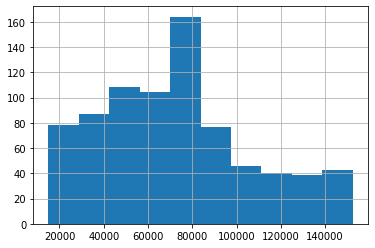

In [23]:
dataset['wage'].hist()

In [24]:
condition_median = dataset.groupby(['gender', 'purchased'])['wage'].transform('median')

In [25]:
dataset['wage'].fillna(condition_median,inplace=True)

### Conclusión
Por medio del comando isna se pudo determinar en que variable se encontraban los missing values, así entonces se pudo notar que se encontraban en la variable wage 214 missing values, teniendo en cuenta lo anterior se compararon dos escenarios, uno en el que los missing values se removían de la base y otro en el que permanecían para así determinar si habían diferencias significativas que podían existir en cada uno de los casos, se encontró que respecto a las variables Gender y Purchased no había una diferencia significativa y por ende se pudo realizar una imputación con estadística condicionada respecto a la media del salario para optimizar la asimetría en los datos. 


## Enriquecimiento del dataset (Calculo de edad y nueva columna)

In [26]:
from datetime import datetime
datetime.today()

datetime.datetime(2023, 3, 10, 1, 10, 58, 468900)

In [27]:
dataset['year'] = np.ceil((datetime.today()-dataset['birth_day'])/(np.timedelta64(1,'Y')))

In [28]:
dataset.head()

,user_id,gender,wage,purchased,birth_day,year
0,217,female,63500.0,0,1983-08-06,40.0
1,226,female,146500.0,1,1972-01-28,52.0
2,697,male,88750.0,1,1981-12-12,42.0
3,743,female,63500.0,0,1983-05-26,40.0
4,63,female,140500.0,1,1967-11-02,56.0


### Conclusión
Para este caso se buscó enriquecer la base de datos mediante la adición de una nueva columna donde se pudiera encontrar la edad de cada individuo, para esto se hizo de la variable birth_day que ya se tenía y de la fecha actual 


## Outliers

In [29]:
dataset = dataset.drop(columns=['user_id','birth_day'])

In [30]:
dataset = pd.get_dummies(dataset,drop_first=True)

In [31]:
dataset.head()

,wage,purchased,year,gender_male
0,63500.0,0,40.0,0
1,146500.0,1,52.0,0
2,88750.0,1,42.0,1
3,63500.0,0,40.0,0
4,140500.0,1,56.0,0


In [32]:
isolation = IsolationForest(random_state=0).fit(dataset)
dataset['isolation_forest'] = isolation.predict(dataset)
dataset['isolation_forest'].value_counts()

-1    505
 1    495
Name: isolation_forest, dtype: int64

### Conclusión
Para encontrar los outliers se realizo un isolation forest transformando como dummies la base de datos y con dicho método utilizado se encontró que habían 512 outliers (datos atípicos), en suma, al ser una cantidad significante de datos no se pudo hacer la eliminación de estos y es necesario que para otras ocasiones en las que se requiera profundizar más al respecto se busque otro método en el que los outliers sean menores.


## Clasificación de datos

##### Categorización en grupos etarios

In [36]:
dataset['yearclasiffication'] = pd.cut(dataset['year'],5)
dataset['yearclasiffication']

0      (37.4, 46.6]
1      (46.6, 55.8]
2      (37.4, 46.6]
3      (37.4, 46.6]
4      (55.8, 65.0]
           ...     
995    (46.6, 55.8]
996    (46.6, 55.8]
997    (46.6, 55.8]
998    (28.2, 37.4]
999    (37.4, 46.6]
Name: yearclasiffication, Length: 1000, dtype: category
Categories (5, interval[float64, right]): [(18.954, 28.2] < (28.2, 37.4] < (37.4, 46.6] <
                                           (46.6, 55.8] < (55.8, 65.0]]

##### Categorización en grupos de ingreso

In [38]:
dataset['wageclasiffication'] = pd.cut(dataset['wage'],3)
dataset['wageclasiffication']

0      (60833.333, 106666.667]
1       (106666.667, 152500.0]
2      (60833.333, 106666.667]
3      (60833.333, 106666.667]
4       (106666.667, 152500.0]
                ...           
995       (14862.5, 60833.333]
996    (60833.333, 106666.667]
997     (106666.667, 152500.0]
998     (106666.667, 152500.0]
999       (14862.5, 60833.333]
Name: wageclasiffication, Length: 1000, dtype: category
Categories (3, interval[float64, right]): [(14862.5, 60833.333] < (60833.333, 106666.667] <
                                           (106666.667, 152500.0]]

### Conclusión
Entorno a la clasificación de los datos se buscó categorizar de forma etaria y en grupos de ingreso la información; en el primer caso se hicieron 5 subcategorías y en el segundo 3 categorías. 
Los grupos etarios quedaron con un límite de edad inferior de 18 años y superior de 65; los grupos de ingreso quedaron definidos con un límite inferior de USD 14.862 y un límite superior de USD 152.500


## Tablas pivot 

#### % de compras por grupos etarios

In [ ]:
dataset.pivot_table(index=['yearclasiffication'], 
                     values='purchased', 
                     aggfunc=['mean'])

,mean
,purchased
yearclasiffication,
"(18.954, 28.2]",0.014388
"(28.2, 37.4]",0.165179
"(37.4, 46.6]",0.294671
"(46.6, 55.8]",0.790244
"(55.8, 65.0]",0.946903


##### Conclusión
La tabla pivot que relaciona el % de compras por grupos etarios nos permite observar que en el límite inferior donde se encuentran individuos entre los 18 y 28 años de edad han hecho compras en promedio 14% y por otro lado el límite superior, donde se encuentras los individuos entre los 55 y 65 años han hecho compras correspondientes un 94% 

#### % de compras por grupos de ingreso

In [ ]:
dataset.pivot_table(index=['wageclasiffication'], 
                     values='purchased', 
                     aggfunc=['mean'])

,mean
,purchased
wageclasiffication,
"(14862.5, 60833.333]",0.324921
"(60833.333, 106666.667]",0.333333
"(106666.667, 152500.0]",0.842857


##### Conclusión

Dada la tabla pivot de % de compras por grupos de ingreso se puede evidenciar que los individuos que tienen el mayor salario (106666-152500) han comprado un 84% y los individuos con menor salario (14862-60833) han comprado un 32%

#### % de compras por género

In [ ]:
dataset.pivot_table(index=['gender_male'], 
                     values='purchased', 
                     aggfunc=['mean'])

,mean
,purchased
gender_male,
0,0.423372
1,0.378661


##### Conclusión
Dada la tabla pivot de % de compras por género se puede observar que las mujeres (0) han comprado un 42% y los hombres (1) han comprado alrededor de un 5% menos que las mujeres

#### % de compras por grupos etarios, grupos de ingreso y género

In [ ]:
dataset.pivot_table(index=['yearclasiffication','wageclasiffication','gender_male'], 
                     values='purchased', 
                     aggfunc=['mean'])

mean
                                                       purchased
yearclasiffication wageclasiffication      gender_male          
(18.954, 28.2]     (14862.5, 60833.333]    0            0.000000
                                           1            0.000000
                   (60833.333, 106666.667] 0            0.031250
                                           1            0.000000
                   (106666.667, 152500.0]  0            0.333333
(28.2, 37.4]       (14862.5, 60833.333]    0            0.000000
                                           1            0.000000
                   (60833.333, 106666.667] 0            0.120690
                                           1            0.140351
                   (106666.667, 152500.0]  0            0.666667
                                           1            0.857143
(37.4, 46.6]       (14862.5, 60833.333]    0            0.040000
                                           1            0.073171
                   (60833.333, 106666.667] 0            0.221154
                                           1            0.284404
                   (106666.667, 152500.0]  0            0.818182
                                           1            1.000000
(46.6, 55.8]       (14862.5, 60833.333]    0            0.791667
                                           1            0.903226
                   (60833.333, 106666.667] 0            0.736842
                                           1            0.727273
                   (106666.667, 152500.0]  0            0.833333
                                           1            0.750000
(55.8, 65.0]       (14862.5, 60833.333]    0            0.920000
                                           1            1.000000
                   (60833.333, 106666.667] 0            0.903226
                                           1            1.000000
                   (106666.667, 152500.0]  0            0.928571
                                           1            1.000000

##### Conclusión
Gracias a la tabla pivot que nos permite evidenciar el % de compras por grupos etarios, de ingreso y género se puede evidenciar que el salario es directamente proporcional al porcentaje de compras, ya que a medida de que los individuos tienen un mayor salario en general realizan mayores compras. Por otro lado, entre más edad tienen los individuos también se evidencia un incremento proporcional en su porcentaje de compras

#### Ingreso medio y mediano por grupos etarios

In [ ]:
dataset.pivot_table(index=['yearclasiffication'], 
                     values='wage', 
                     aggfunc=['mean','median'])

,mean,median
,wage,wage
yearclasiffication,,
"(18.954, 28.2]",58582.733813,62500.0
"(28.2, 37.4]",70083.705357,63500.0
"(37.4, 46.6]",76333.855799,71500.0
"(46.6, 55.8]",76145.121951,81500.0
"(55.8, 65.0]",82024.336283,88750.0


##### Conclusión
Dada la tabla pivot del ingreso medio y mediano por grupos etarios es posible evidenciar que en promedio cuando los individuos son más jovenes tienden a recibir un menor salario, sin embargo el valor mediano de los salarios de estos individuos es superior al promedio.
Por otro lado, se evidencia un contraste entre los individuos de 28 a 46 años ya que aunque tienen un salario en promedio mayor a los jóvenes, su salario mediano es menor al promedio pagado.

#### Ingreso medio y mediano por género

In [ ]:
dataset.pivot_table(index=['gender_male'], 
                     values='wage', 
                     aggfunc=['mean','median'])

,mean,median
,wage,wage
gender_male,,
0,74896.551724,69500.0
1,71076.882845,66500.0


##### Conclusión
Respecto al ingreso medio y mediano por género, se puede evidenciar que las mujeres están recibiendo un salario promedio superior al de los hombres y también un valor mediano superior que ellos, aunque tampoco es una proporción altamente significativa.

#### Conclusión general

Teniendo en cuenta todo lo anterior, es importante resaltar inicialmente que no hay presencia de datos inconsistentes dentro de la base de datos, por otro lado, solo se encontraron missing values en una variable (wage) con una proporción significante, que quedo demostrada al encontrar una gran cantidad de outliers en el isolation forest.

Por otro lado, es importante destacar el enriquecimiento de la data que permitió desarrollar categorizaciones y análisis de porcentajes de compras y del ingreso de los individuos de una manera óptima.
Así entonces, se pudo determinar que los salarios dependen mucho de la edad de los individuos, y así mismo esto se relaciona con las compras que realizan en su día a día, en contraste con esto también se pudo notar que entre géneros no hay una brecha altamente significativa en los ingresos, aunque las mujeres tienen un ingreso levemente superior.